In [2]:
import sklearn

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\Vikram\miniconda3\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [7]:
X,y = mnist['data'], mnist['target']

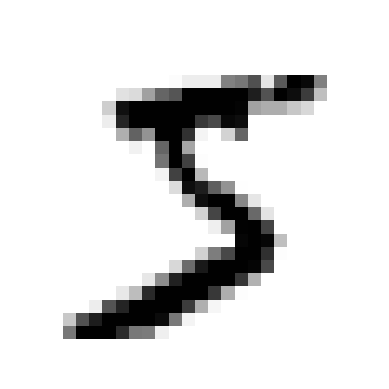

In [8]:
# plt.imshow(X[0].reshape(28,28), cmap='binary')
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
# plt.show()

In [9]:
y[0]

'5'

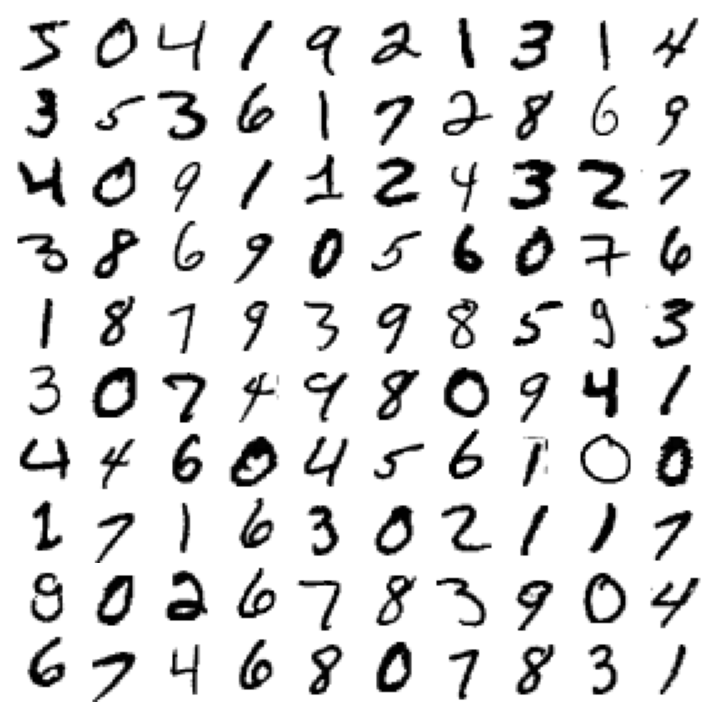

In [10]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [12]:
y_train.shape

(60000,)

In [13]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
some_digit = X[0]
sgd_clf.predict([some_digit])

array([ True])

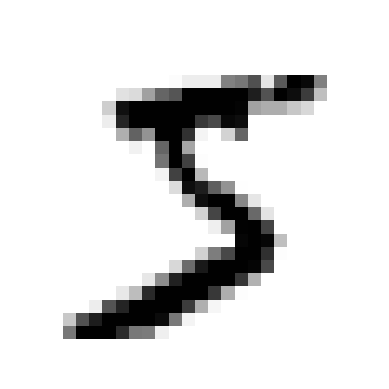

In [16]:
plot_digit(some_digit)

In [17]:
y[0]

'5'

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    X_test_folds = X_train[test_index]
    y_train_folds = y_train_5[train_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred_folds = clone_clf.predict(X_test_folds)
    print((y_pred_folds == y_test_folds).mean())

0.95035
0.96035
0.9604


In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [21]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

## Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict

y_cross_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_cross_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

## Precision and Recall

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_cross_pred)

0.8370879772350012

In [25]:
recall_score(y_train_5, y_cross_pred)

0.6511713705958311

In [26]:
cm[1,1]/(cm[1,1]+cm[0,1])

0.8370879772350012

In [27]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.6511713705958311

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_cross_pred)

0.7325171197343846

In [29]:
cm[1,1]/(cm[1,1] + (cm[0,1] + cm[1,0])/2)

0.7325171197343847

## Precision/Recall Trade-off

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [31]:
#              calling predict()
y_scores > 0

array([ True])

In [32]:
threshold = 3000
(y_scores > threshold)

array([False])

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [49]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

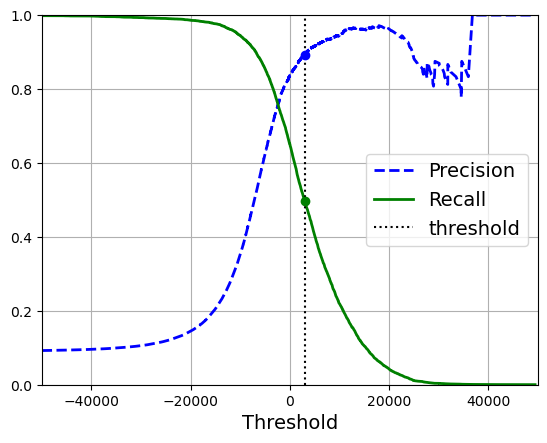

In [54]:
plt.plot(thresholds, precisions[:-1], "b--" ,label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-" ,label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

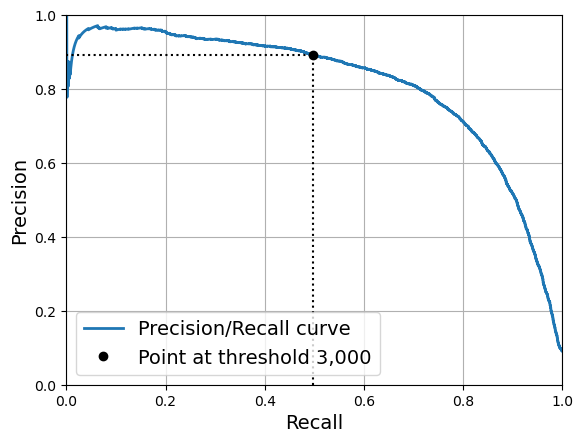

In [36]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.axis([0,1,0,1])
plt.vlines(recalls[idx], 0, precisions[idx], "k", "dotted", )
plt.hlines(precisions[idx], 0, recalls[idx], "k", "dotted", )
plt.plot(recalls[idx], precisions[idx], "ko", label="Point at threshold 3,000")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()
plt.show()

In [37]:
idx_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_90_precision]
threshold_for_90_precision

3370.019499143955

In [38]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [39]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [40]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# The ROC Curve

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [42]:
idx = (thresholds <= threshold_for_90_precision).argmax()
idx

520

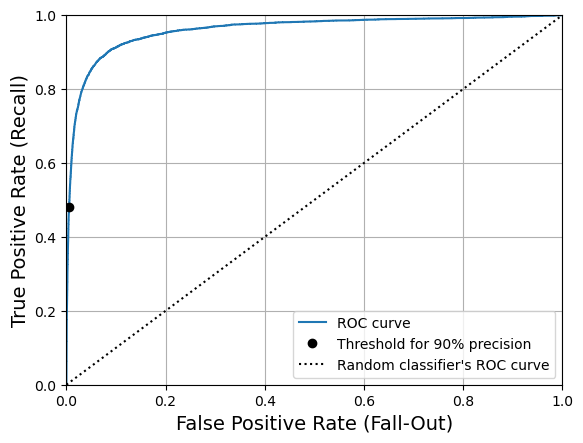

In [43]:
plt.plot(fpr, tpr, label="ROC curve")
plt.axis([0,1,0,1])
plt.plot(fpr[idx], tpr[idx], "ko", label="Threshold for 90% precision")
plt.plot([0,1], [0,1], "k:", label="Random classifier's ROC curve")
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid()
plt.legend(loc="lower right", fontsize="10")
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
forest_clf = RandomForestClassifier(random_state=42)

In [56]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [57]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

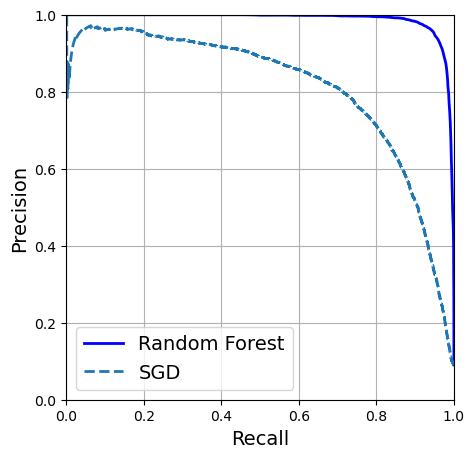

In [69]:
plt.figure(figsize=(5, 5))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [80]:
idx_50_to_60 = (y_probas_forest[:,1] > 0.5) & (y_probas_forest[:,1] < 0.6)
y_train_5[idx_50_to_60].sum() / idx_50_to_60.sum()

0.9395604395604396

In [82]:
y_train_pred_forest = (y_probas_forest[:,1] >= 0.5)
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [83]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Multiclass Classification

In [84]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [86]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [87]:
svm_clf.decision_function([some_digit]).round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [88]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [89]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [90]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [91]:
len(ovr_clf.estimators_)

10

In [92]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [93]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [94]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [95]:
# Random classifier
random_clf = DummyClassifier(strategy="uniform", random_state=42)
cross_val_score(random_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.102  , 0.10015, 0.1003 ])

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# Error Analysis

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

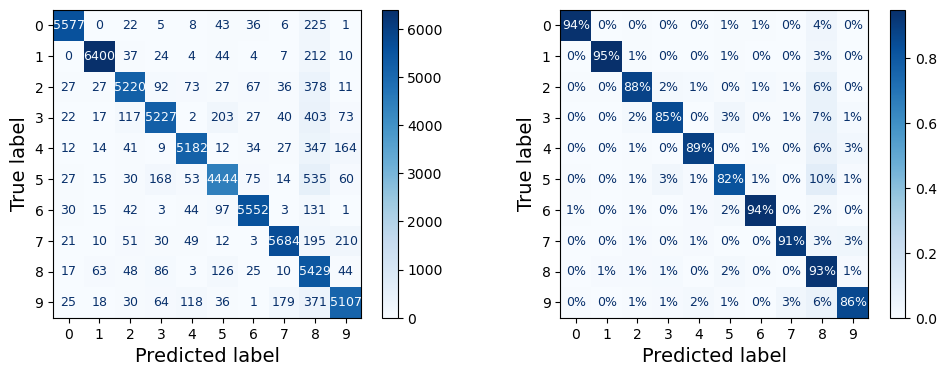

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, cmap="Blues", ax=axs[0])

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%", cmap="Blues", ax=axs[1])
plt.show()

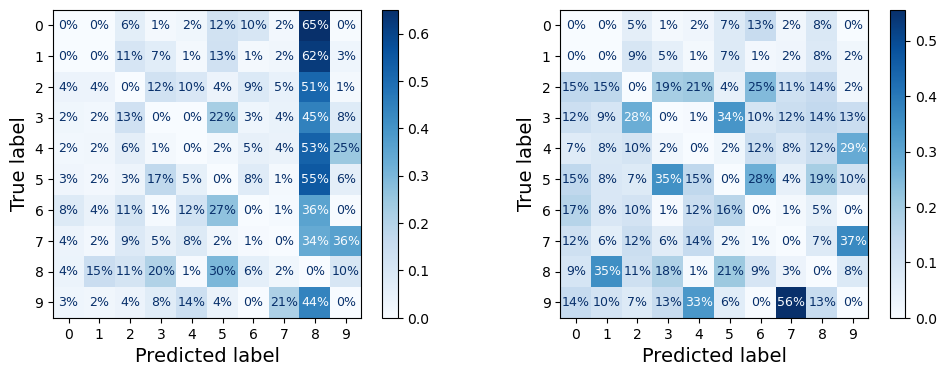

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.rc('font', size=9)
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight , normalize="true", values_format=".0%", cmap="Blues", ax=axs[0])

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight , normalize="pred", values_format=".0%", cmap="Blues", ax=axs[1])
plt.show()

In [114]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

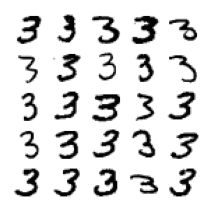

In [117]:
plt.figure(figsize=(2.5,2.5))
for i, img in enumerate(X_aa[:25]):
    plt.subplot(5,5,i+1)
    plot_digit(img)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
    

# Multilabel Classification

In [118]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [119]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [120]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [121]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

In [122]:
f1_score(y_multilabel, y_train_knn_pred, average='weighted')

0.9778357403921755

In [123]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [124]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput Classification

In [125]:
np.random.seed(42) # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

In [126]:
y_train_mod = X_train
y_test_mod = X_test

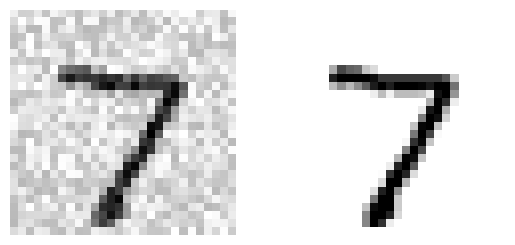

In [127]:
plt.subplot(121)
plot_digit(X_test_mod[0])
plt.subplot(122)
plot_digit(y_test_mod[0])
plt.show()

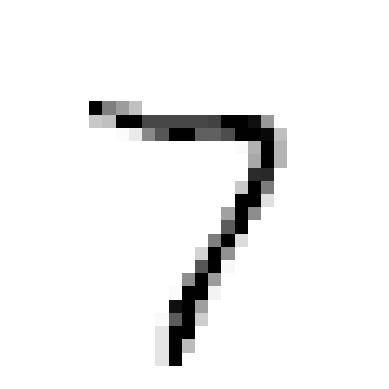

In [128]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()